In [2]:
Аналитика матчей в киберспортивной дисциплине Dota2

Анализ зависимостей различных параметров друг от друга.

В мире где кинофильмы заработали в 2018 году 41,7 млрд. долларов, киноиндустрия стала популярнее, чем когда-либо. Но какие фильмы приносят больше всего денег в кассах? Насколько важен директор? Или бюджет?

В современном мире очень важно понимать экономически выгодно ли снять фильм.На данном этапе развития киноиндустрии бюджеты фильмов крайне велики, что говорит о том что инвестиции в фильмы относятся к категории рисковых инвестиций. Поэтому необходимо создание математических моделей, позволяющих оценивать степени риска неокупаемости кинопроекта.

hero_id - id персонажа (всего их 122, но у каждого есть также своя особая роль)

xp_hero - опыт, полученный в игре

gold_spent - количество потраченного золота

gold_per_min - количество золота в минуту

xp_per_min - количество заработанного опыта в минуту

account_id - id аккаунта игрока

kills/deaths/assists - счет игрока в игре

item_[0-5] - собранные атрибуты за игру

,hero_id,gold_spent,xp_hero
9980,11,13960,4770.0
9981,33,7965,6300.0
9982,5,8075,6063.0
9983,73,17415,4614.0
9984,9,10660,6213.0
9985,28,16540,8925.0
9986,74,11725,6631.0
9987,26,13555,9936.0
9988,46,26035,20183.0
9989,10,15160,3792.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from tqdm import tqdm
from ast import literal_eval
import seaborn as sns
import re
import numpy as np
from sklearn.externals import joblib
from sklearn.preprocessing import MultiLabelBinarizer

players= pd.read_csv('/home/ern-lin/data_analysis/datasets/dota2_players.csv')
players.tail(20)

/home/ern-lin/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
9980,998,5269,11,0,464,13960,406,467,7,10,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9981,998,0,33,1,2408,7965,307,349,4,11,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9982,998,0,5,2,680,8075,247,289,2,12,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9983,998,0,73,3,582,17415,498,431,2,8,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9984,998,0,9,4,310,10660,297,355,7,5,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
9985,998,0,28,128,1725,16540,461,497,10,3,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9986,998,0,74,129,5117,11725,426,517,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9987,998,0,26,130,726,13555,380,406,4,5,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,998,0,46,131,1862,26035,704,823,24,6,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9989,998,0,10,132,619,15160,422,398,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
players= pd.read_csv('/home/ern-lin/data_analysis/datasets/dota2_players.csv', usecols=["hero_id", "gold_spent", "xp_hero"])
players.tail(20)

,hero_id,gold_spent,xp_hero
9980,11,13960,4770.0
9981,33,7965,6300.0
9982,5,8075,6063.0
9983,73,17415,4614.0
9984,9,10660,6213.0
9985,28,16540,8925.0
9986,74,11725,6631.0
9987,26,13555,9936.0
9988,46,26035,20183.0
9989,10,15160,3792.0


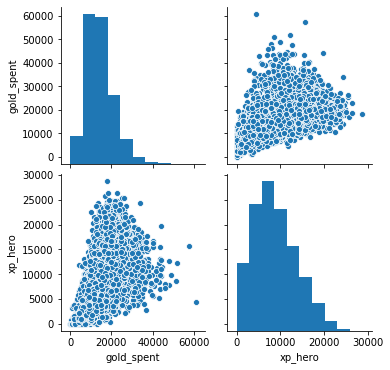

In [3]:
pl = players.select_dtypes(['number']).drop(['hero_id'], axis=1).fillna(0)
sns.pairplot(pl)

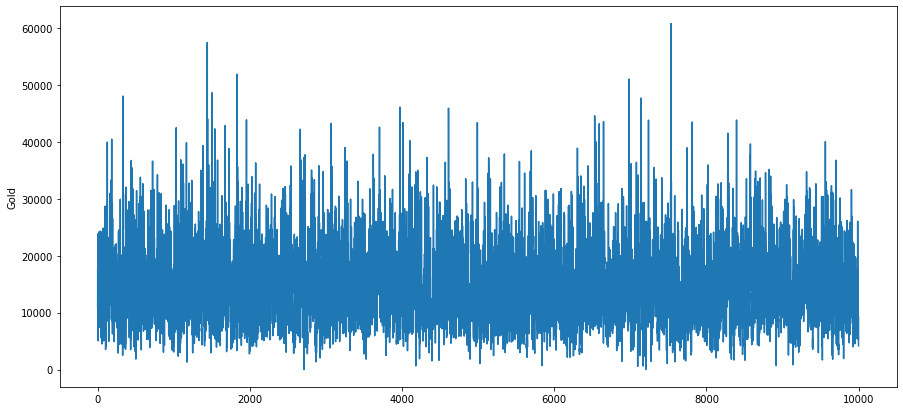

In [4]:
plt.figure(figsize=(15,7))
players.gold_spent.plot()
plt.ylabel('Gold')
plt.show()

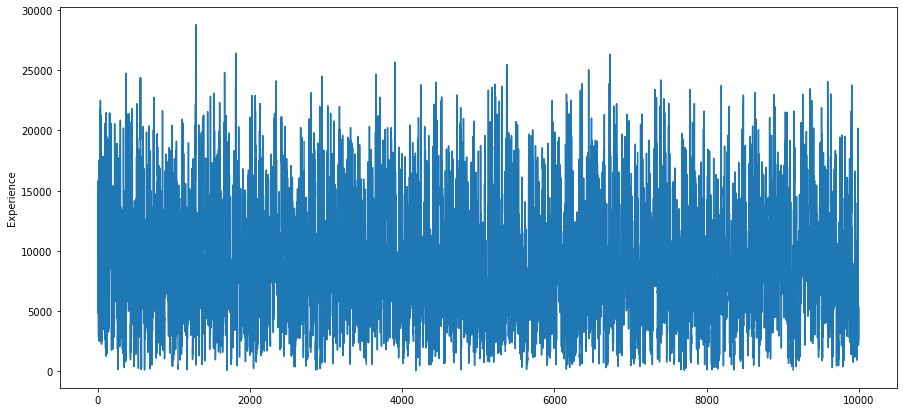

In [5]:
plt.figure(figsize=(15,7))
players.xp_hero.plot()
plt.ylabel('Experience')
plt.show()

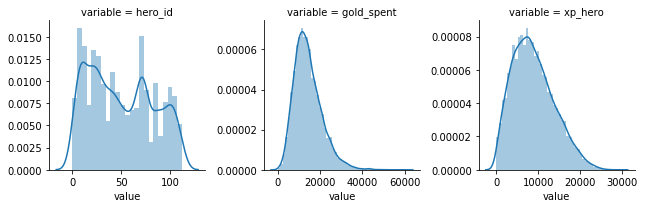

In [6]:
num = [f for f in players.columns if players.dtypes[f] != 'object']
nd = pd.melt(players, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

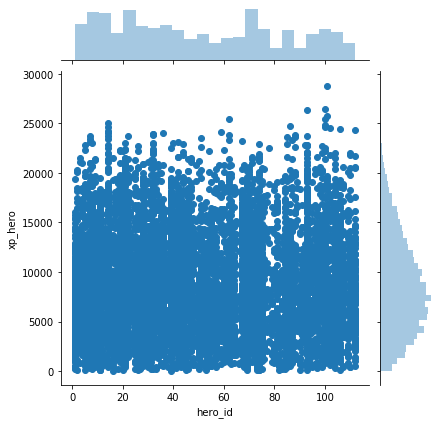

In [7]:
sns.jointplot(x=players['hero_id'], y=players['xp_hero'])

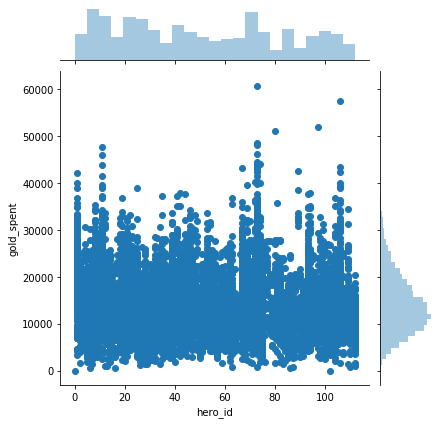

In [8]:
sns.jointplot(x=players['hero_id'], y=players['gold_spent'])

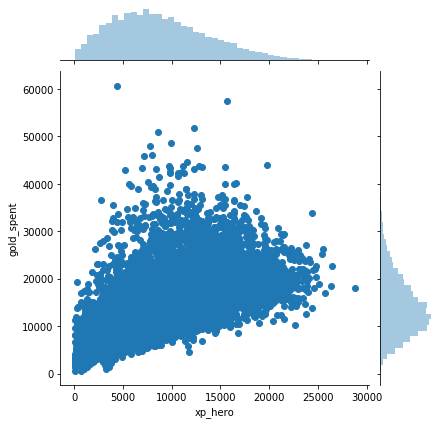

In [9]:
sns.jointplot(x=players['xp_hero'], y=players['gold_spent'])